<a href="https://colab.research.google.com/github/Owinoh-victor/EDA-on-IT-Salary-Suevey-2020/blob/main/EDA_on_IT_salary_2020_survey_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK
1. Data Acqusition and loading

2. Data Cleansing

3. DATA VIZUALIZATION

 1. Categorical Salary Distribution eg Average Total Income By:

      a. City

      b. Age

      c. Company Type

      d. Gender

      e. Company Size

      f. Total Years of Experience

 2. Technology Popularity 

      a. Main technology

      b. Susidiary Technology

      c. Popularity By Company Type

      d. Poplularity By Years of Experience

 3.    Salary & Technology

      a. Average Total Income By position

      b. Average Total Income By Main and Subsidiary technology

      c. Average Total Income By Employment Status

 4. Data Science Drill Down

      a. What is the avarage pay per Data  Related positions

      b. Best paying cities  to work as a Data Scientist

      c. Data Roles Pay per technology

      d. Data science pay by seniority   and years of experince

 5. Impacts of Covid 19 to IT Roles

      a. Job  Loss due to covid 19

      b. Additional Monetary Support from Employers

      c.  Shorter Working Hours due to covid 19

      d.  Job  Loss by Position due to covid 19

 6. Other Explorations

      a. Yearly Bonus + Stock By Employment status, ageGroup & Seneority Level

      b. Total  Income By Main Language at work

      c. Number of Vacation Daya By Employment status
       
      d. Number of Vacation Daya By Company Type      

In [ ]:
# packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Load the data
df_2020=pd.read_csv("/content/IT Salary Survey EU  2020.csv")

In [ ]:
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


#Checking for Columns and Data types

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country']

 # rename columns
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

 # categorical features
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']


**REMARKS:** A few features above seem rather numerical than categorical, e. g. Number of vacation days. However, there are several string entries in those columns. Here we would need a more in depth data cleaning

In [ ]:
# look at an example of a messy "numerical" columns
df_2020['Number of vacation days'].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
32                                                8
22                                                8
31                                                8
35                                                5
36                                                5
0                                                 4
40                                                4
23                                                4
14                                                3
33                                                3
unlimited   

**NOTE:** We'll fix that specific column later during data cleaning

In [ ]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR',]

In [ ]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

0

Yep, all good! Lets now proceed to Data Cleaning

#2. DATA CLEANING

Missing values

In [ ]:
# fill missing values

# >>> categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# >>> numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

Outliers

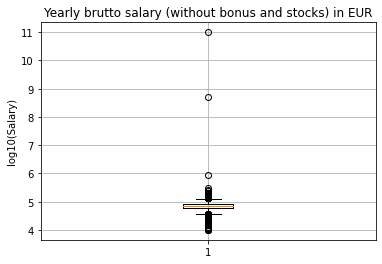

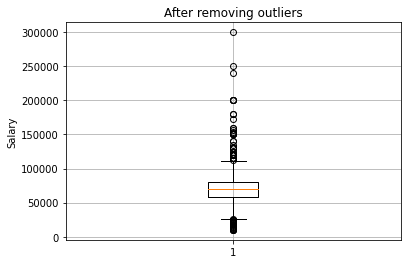

In [ ]:
# check for outliers
plt.boxplot(np.log10(df_2020['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.title('Yearly brutto salary (without bonus and stocks) in EUR')
plt.ylabel('log10(Salary)')
plt.grid()
plt.show()

# remove very high values
cut_point = 500000
df_2020 = df_2020[df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] <= cut_point]
plt.boxplot(df_2020['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title('After removing outliers')
plt.ylabel('Salary')
plt.grid()
plt.show()

Clean strings

In [ ]:
# string cleaning (remove redundant spaces and convert to upper case)
# => reduce risk of "hidden" duplicates
def clean_string(x):
    return x.strip().upper()

features_for_string_cleaning = ['City', 'Position', 'Employment status',
                                'Your main technology / programming language',
                                'Other technologies/programming languages you use often',
                                'Seniority level',
                                'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                                'Number of vacation days']

for f in features_for_string_cleaning:
    df_2020[f] = df_2020[f].apply(clean_string)

Reduce number of levels

In [ ]:
# reduce number of levels: "Position"
current_feature = 'Position'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Position
SOFTWARE ENGINEER                             387
BACKEND DEVELOPER                             174
DATA SCIENTIST                                110
FRONTEND DEVELOPER                             88
QA ENGINEER                                    71
                                             ... 
STUDENT, SOFTWARE DEVELOPER, DATA ENGINEER      1
BANKER                                          1
PROFESSOR                                       1
QA LEAD                                         1
XR DEVELOPER                                    1
Name: Position, Length: 134, dtype: int64

REDUCED TO:
SOFTWARE ENGINEER      387
BACKEND DEVELOPER      174
_OTHER_                115
DATA SCIENTIST         110
FRONTEND DEVELOPER      88
QA ENGINEER             71
DEVOPS                  57
MOBILE DEVELOPER        53
ML ENGINEER             41
PRODUCT MANAGER         39
DATA ENGINEER           26
DESIGNER (UI/UX)        16
ENGINEERING MANAGER     11
DATA ANALYST            1

reduce number of levels: "Seniority level"

In [ ]:
# reduce number of levels: "Seniority level"
current_feature = 'Seniority level'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Seniority level
SENIOR                                      564
MIDDLE                                      365
LEAD                                        166
JUNIOR                                       79
HEAD                                         44
_MISSING_                                    11
PRINCIPAL                                     3
NO LEVEL                                      2
STUDENT                                       2
INTERN                                        2
C-LEVEL                                       1
WORKING STUDENT                               1
WORK CENTER MANAGER                           1
MANAGER                                       1
C-LEVEL EXECUTIVE MANAGER                     1
SELF EMPLOYED                                 1
ENTRY LEVEL                                   1
VP                                            1
CTO                                           1
NO IDEA, THERE ARE NO RANGES IN THE FIRM      1
KEY           

In [ ]:
# reduce number of levels: "Main language at work"
current_feature = 'Main language at work'

# manual adjustment first
df_2020[current_feature].loc[df_2020[current_feature]=='Русский'] = 'Russian'

print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Main language at work
English               1018
German                 186
_MISSING_               15
Russian                 14
Spanish                  3
Italian                  3
Polish                   2
Czech                    2
English and German       2
50/50                    1
Russian, English         1
both                     1
Deuglisch                1
French                   1
Name: Main language at work, dtype: int64

REDUCED TO:
English      1018
German        186
_MISSING_      15
Russian        14
_OTHER_        11
Spanish         3
Italian         3
Name: Main language at work, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# reduce number of levels: "Employment status"
current_feature = 'Employment status'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Employment status
FULL-TIME EMPLOYEE                                                                 1188
SELF-EMPLOYED (FREELANCER)                                                           28
_MISSING_                                                                            16
PART-TIME EMPLOYEE                                                                    8
FOUNDER                                                                               3
WORKING STUDENT                                                                       2
FULL-TIME, BUT 32 HOURS PER WEEK (IT WAS MY REQUEST, I'M A STUDENT)                   1
WERKSTUDENT                                                                           1
INTERN                                                                                1
FULL-TIME POSITION, PART-TIME POSITION, & SELF-EMPLOYED (FREELANCING, TUTORING)       1
COMPANY DIRECTOR                                                                      1
Name

In [ ]:
# reduce number of levels: "Company type"
current_feature = 'Company type'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Company type
Product                759
Startup                251
Consulting / Agency    142
_MISSING_               24
Bank                     5
                      ... 
Non-tech retail          1
Corporation              1
Research institute       1
Financial                1
Education                1
Name: Company type, Length: 64, dtype: int64

REDUCED TO:
Product                759
Startup                251
Consulting / Agency    142
_OTHER_                 63
_MISSING_               24
Bank                     5
E-commerce               3
Media                    3
Name: Company type, dtype: int64


In [ ]:
# reduce number of levels: "Have you received additional monetary support..."
current_feature = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR
_MISSING_                                                  790
0                                                          160
500                                                         47
NO                                                          40
1000                                                        23
600                                                         20
200                                                         19
1500                                                        19
300                                                         18
700                                                         14
400                                                         12
250                                                          7
800                                                          7
2000                                               

In [ ]:
# reduce number of levels: "Have you lost your job due to the coronavirus outbreak?"
current_feature = 'Have you lost your job due to the coronavirus outbreak?'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you lost your job due to the coronavirus outbreak?
No                                                                                        1161
Yes                                                                                         62
_MISSING_                                                                                   19
Laid off for a bit                                                                           1
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Leads and project inquiries have slowed down                                                 1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
yes but found a new one with better pay / perks                                              1
Have been a freelancer at the beginning of year                                

Fix vacation days

In [ ]:
current_feature = 'Number of vacation days'
# show all levels 
print(df_2020[current_feature].value_counts().index.tolist())

['30', '28', '27', '25', '26', '_MISSING_', '24', '29', '20', '21', 'UNLIMITED', '31', '22', '32', '36', '23', '35', '0', '40', '14', '33', '45', '12', '15', '365', '~25', '50', '16', '37', '30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)', '1', '10', '(NO IDEA)', '38', '23+', '34', '37.5', '24 LABOUR DAYS', '39', '60', '5', '3']


In [ ]:
# replace levels
df_2020[current_feature].loc[df_2020[current_feature]=='30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)'] = 'UNLIMITED'
df_2020[current_feature].loc[df_2020[current_feature]=='23+'] = '23'
df_2020[current_feature].loc[df_2020[current_feature]=='(NO IDEA)'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='24 LABOUR DAYS'] = '24'
df_2020[current_feature].loc[df_2020[current_feature]=='~25'] = '25'
df_2020[current_feature].loc[df_2020[current_feature]=='365'] = 'UNLIMITED'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Fix experience(s)**

In [ ]:
current_feature = 'Total years of experience'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

['10', '5', '6', '8', '7', '4', '12', '3', '15', '9', '2', '11', '13', '14', '1', '20', '16', '_MISSING_', '18', '17', '25', '19', '0', '22', '30', '2.5', '21', '1,5', '0.8', '1.5', '4.5', '23', '27', '3.5', '6.5', '28', '15, thereof 8 as CTO', '1 (as QA Engineer) / 11 in total', '383', '6 (not as a data scientist, but as a lab scientist)', 'less than year', '7.5', '31', '29', '26', '40', '5.5', '24', '2,5']


In [ ]:
# replace levels
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '1'
df_2020[current_feature].loc[df_2020[current_feature]=='15, thereof 8 as CTO'] = '15'
df_2020[current_feature].loc[df_2020[current_feature]=='1 (as QA Engineer) / 11 in total'] = '11'
df_2020[current_feature].loc[df_2020[current_feature]=='383'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
current_feature = 'Years of experience in Germany'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

['2', '1', '3', '5', '4', '0', '6', '7', '_MISSING_', '10', '1.5', '9', '8', '0.5', '12', '2.5', '3.5', '15', '11', '20', '14', '1,5', '0,5', '13', '30', '0.25', '2,5', '19', '18', '3,5', '3 months', '0,3', '0.8', '1,7', '0.4', '0.2', '<1', '6 (not as a data scientist, but as a lab scientist)', '4 month', '< 1', 'less than year', '4 (in Switzerland), 0 (in Germany)', '25', '0.9', '-', '17', '26', '⁰', '4.5', '4,5', '2.6', '16', '0.1', '3 (in Poland)']


In [ ]:
# replace levels
df_2020[current_feature].loc[df_2020[current_feature]=='0,3'] = '0.3'
df_2020[current_feature].loc[df_2020[current_feature]=='0,5'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,7'] = '1.7'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3,5'] = '3.5'
df_2020[current_feature].loc[df_2020[current_feature]=='4,5'] = '4.5'
df_2020[current_feature].loc[df_2020[current_feature]=='<1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='< 1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3 months'] = '0.25'
df_2020[current_feature].loc[df_2020[current_feature]=='4 month'] = '0.33'
df_2020[current_feature].loc[df_2020[current_feature]=='4 (in Switzerland), 0 (in Germany)'] = '0'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='⁰'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='3 (in Poland)'] = '0'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Fix bonus/stocks**

In [ ]:
current_feature = 'Yearly bonus + stocks in EUR'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

[-1, '0', '5000', '10000', '2000', '6000', '1000', '3000', '20000', '4000', '15000', '7000', '8000', '70000', '75000', '12000', '30000', '101', '100000', '1500', '40000', '60000', '50000', '25000', '80000', '120000', '55000', '200000', '500', '65000', '7500', '45000', '35000', '9000', '18000', '77000', '90000', '11000', '85000', '73000', '62000', '4500', '17000', '150000', '95000', '56000', '15900', '16000', '800', '78000', '13000', '14000', '72000', '6500', '2500', '99000', '5400', '19200', '37968', '5800', '6300', '5500', '106000', '96000', '8500', '38500', '47500', '60847.32', '63909', '45600', '9450', '3600', '14500', '26000', '3500', '66447', '88000', 'bvg only', '2400', '82500', '7200', '22000', '89000', '92000', '46000', '32000', '53500', '1100', '1200', '5600', '74000', '125000', '77400', '1600', '6900', '1250', '10300', '59000', '43500', '63000', '112000', '-', '450000', '107000', '1150000', '700', '84000', '86000', '70500', '67000', '43000', 'Na', '22500', 'depends', '25', '9

In [ ]:
# replace levels
df_2020[current_feature].loc[df_2020[current_feature]=='bvg only'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='15000+-'] = 15000
df_2020[current_feature].loc[df_2020[current_feature]=='Not sure'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='Na'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='depends'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='1150000'] = -1 # seems somewhat high?

# and convert to numeric
df_2020[current_feature] = df_2020[current_feature].astype(float)

# for the sake of simplicity we REPLACE THE MISSINGS/UNKNOWS with 0!!!
df_2020[current_feature].loc[df_2020[current_feature]==-1] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Add sum of salary + bonus as new feature "Total Income**

In [ ]:
df_2020['Total Income (Salary+Bonus)'] = df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] + df_2020['Yearly bonus + stocks in EUR']

In [ ]:
# update list of numerical features correspondingly!
features_num.append('Total Income (Salary+Bonus)')

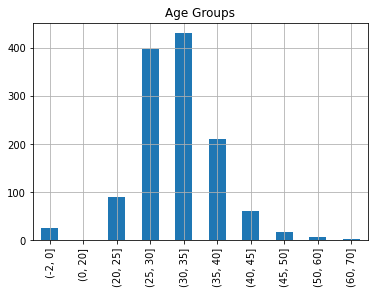

In [ ]:
# add also binned version of age to data frame
df_2020['AgeGroup'] = pd.cut(df_2020.Age, bins=[-2,0,20,25,30,35,40,45,50,60,70])
df_2020.AgeGroup.value_counts().sort_index().plot(kind='bar')
plt.title('Age Groups')
plt.grid()
plt.show()

**NOTE:** It is important to note that (-2,0] represents the missing values

**Export cleansed **

In [ ]:
# save prepared data to file
df_2020.to_csv('/content/df_2020_cleaned.csv')

#3. DATA VIZUALIZATION
1. Categorical Salary Distribution eg Average Total Income By:

      a. City

      b. Age

      c. Company Type

      d. Gender

      e. Company Size

      f. Total Years of Experience

2. Technology Popularity 

      a. Main technology

      b. Susidiary Technology

      c. Popularity By Copany Type

      d. Poplularity By Years of Experience


3.    Salary & Technology

      a. Average Total Income By position

      b. Average Total Income By Main and Subsidiary technology

      c. Average Total Income By Employment Status

4. Data Science Drill Down

      a. What is the avarage pay per Data  Related positions

      b. Best paying cities  to work as a Data Scientist

      c. Data Roles Pay per technology

      d. Data science pay by seniority   and years of experince

5. Impacts of Covid 19 to IT Roles

      a. Job  Loss due to covid 19

      b. Additional Monetary Support from Employers

      c.  Shorter Working Hours due to covid 19

      d.  Job  Loss by Position due to covid 19

6.Other Exploration

    a. Yearly Bonus + Stock By Employment status, ageGroup & Seneority Level
    
    b. Total  Income By Main Language at work

    c. Number of Vacation Daya By Employment status
    
    d. Number of Vacation Daya By Company Type     

**NOTE:** FROM HERE, I WOULD LIKE TO PROCEED WITH THE VIZUALIZATION IN A NEW TOOL THAT  BEST SUITS MY OBJECTIVES. I will use  my cleansed data for the analysis.

Link to my Dashboard: https://app.powerbi.com/groups/me/dashboards/565cb68a-5978-483a-88ac-2be52635960d
    
    